In [43]:
# Import library utama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [44]:
# Jika file forestfires.csv ada di root Colab (setelah di-upload)
data_path = "forestfires.csv"

# Load data
df = pd.read_csv(data_path)

# Cek data awal
df.head()

# Cek info dan statistik deskriptif
print("Jumlah baris, kolom:", df.shape)
print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif (numerik):")
display(df.describe())

print("\nCek missing value tiap kolom:")
print(df.isnull().sum())


Jumlah baris, kolom: (517, 13)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None

Statistik deskriptif (numerik):


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000



Cek missing value tiap kolom:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


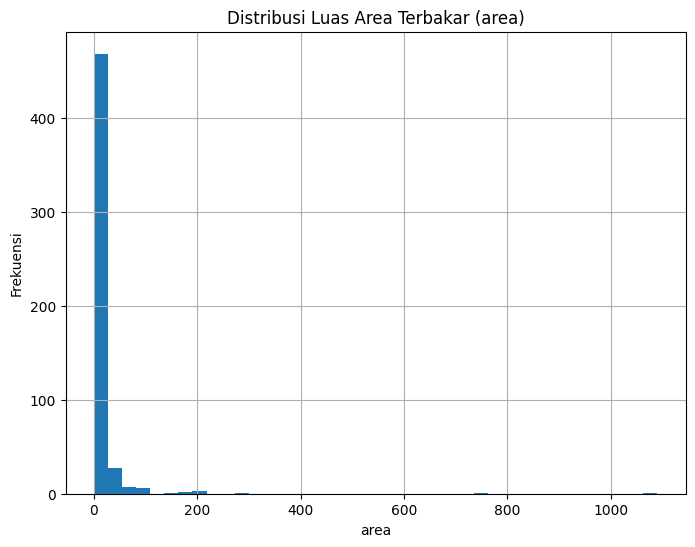

Jumlah data dengan area = 0: 247
Persentase: 47.77562862669246 %


In [45]:
# Distribusi target 'area'
plt.figure(figsize=(8, 6))
df['area'].hist(bins=40)
plt.title("Distribusi Luas Area Terbakar (area)")
plt.xlabel("area")
plt.ylabel("Frekuensi")
plt.show()

# Cek berapa banyak baris dengan area = 0 (tidak ada area terbakar)
zero_area = (df['area'] == 0).sum()
print("Jumlah data dengan area = 0:", zero_area)
print("Persentase:", zero_area / len(df) * 100, "%")


In [46]:
# Definisikan fitur dan target
X = df.drop(columns=['area'])
y = np.log1p(df['area'])   # log(1 + area) untuk mengurangi skew

# Pisah data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Kolom kategorikal dan numerik
cat_features = ['month', 'day']
num_features = [col for col in X.columns if col not in cat_features]

print("Fitur numerik :", num_features)
print("Fitur kategori:", cat_features)


Fitur numerik : ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
Fitur kategori: ['month', 'day']


In [47]:
# Pipeline untuk fitur numerik: imputer + scaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal: imputer + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan keduanya dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Model Random Forest
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Pipeline lengkap: preprocessing -> model
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', rf_model)
])

model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [48]:
# Latih model
model.fit(X_train, y_train)

print("Training selesai.")


Training selesai.


In [49]:
# Prediksi pada data train & test
y_train_pred_log = model.predict(X_train)
y_test_pred_log  = model.predict(X_test)

# Kembalikan ke skala area asli
y_train_true = np.expm1(y_train)
y_test_true  = np.expm1(y_test)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred  = np.expm1(y_test_pred_log)

# Fungsi bantu untuk hitung metrik regresi
def regression_metrics(y_true, y_pred, label=""):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"=== {label} ===")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print("-" * 30)

# Menampilkan metrik untuk data train dan test
regression_metrics(y_train_true, y_train_pred, label="Train")
regression_metrics(y_test_true, y_test_pred, label="Test")


=== Train ===
MAE  : 7.6715
RMSE : 39.5398
R²   : 0.2482
------------------------------
=== Test ===
MAE  : 19.8838
RMSE : 109.9677
R²   : -0.0259
------------------------------


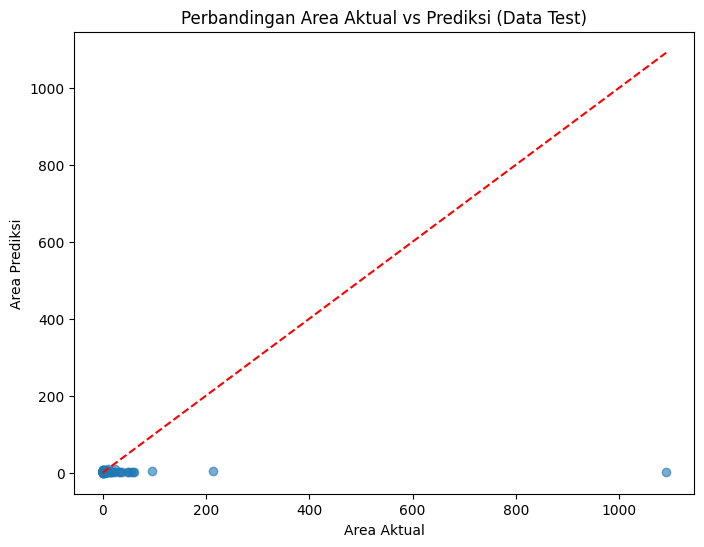

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, alpha=0.6)
plt.xlabel("Area Aktual")
plt.ylabel("Area Prediksi")
plt.title("Perbandingan Area Aktual vs Prediksi (Data Test)")
plt.plot([0, max(y_test_true.max(), y_test_pred.max())],
         [0, max(y_test_true.max(), y_test_pred.max())],
         linestyle="--", color='red')
plt.show()


In [51]:
import joblib

# Menyimpan model untuk digunakan di aplikasi web atau untuk deploy lebih lanjut
joblib.dump(model, "random_forest_forestfires.pkl")

print("Model telah disimpan sebagai random_forest_forestfires.pkl")


Model telah disimpan sebagai random_forest_forestfires.pkl
